In [37]:
# arguments
import yaml
from omegaconf import OmegaConf
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

In [38]:
EXPERIMENT = "01"
MODEL = "trained"
# get the results directory path
results_dir = f"../experiments/{EXPERIMENT}/results/{MODEL}"
print(f"Results directory: {results_dir}")

Results directory: ../experiments/01/results/trained


In [39]:
# get model information from config file
args = OmegaConf.create(yaml.load(open(f"../experiments/{EXPERIMENT}/config.yaml"), Loader=yaml.SafeLoader))
plot_title = f"{MODEL.capitalize()} - {args.model_name} - {args.dataset} - Layers: {args.layer_sizes}"
print(f"Plot title: {plot_title}")

Plot title: Trained - NeuralNetwork - MNIST - Layers: [784, 16, 10]


In [40]:
# create lists to store configurations and data
configs = []
all_eigenvalues = []

for lanczos in sorted(os.listdir(results_dir), reverse=True):
    lanczos_dir = os.path.join(results_dir, lanczos)
    if os.path.isdir(lanczos_dir):
        for batch_dir in sorted(os.listdir(lanczos_dir)):
            if batch_dir.startswith('HBS_'):
                batch_size = int(batch_dir.split('_')[1])
                batch_path = os.path.join(lanczos_dir, batch_dir)                
                for run_dir in sorted(os.listdir(batch_path)):
                    if run_dir.endswith('_run'):
                        run_path = os.path.join(batch_path, run_dir)
                        run_num = int(run_dir.split('_')[0])
                        for file in sorted(os.listdir(run_path)):
                            if file.startswith('eigenvalues_iter_'):
                                iter_num = int(file.split('_')[-1].split('.')[0])
                                # load data
                                eigenvalues = torch.load(os.path.join(run_path, f'eigenvalues_iter_{iter_num}.pt'))
                                weights = torch.load(os.path.join(run_path, f'weights_iter_{iter_num}.pt'))
                                # store configuration and data
                                configs.append({
                                    'lanczos': lanczos,
                                    'batch_size': batch_size,
                                    'run_num': run_num,
                                    'iter_num': iter_num
                                })
                                all_eigenvalues.append(eigenvalues)

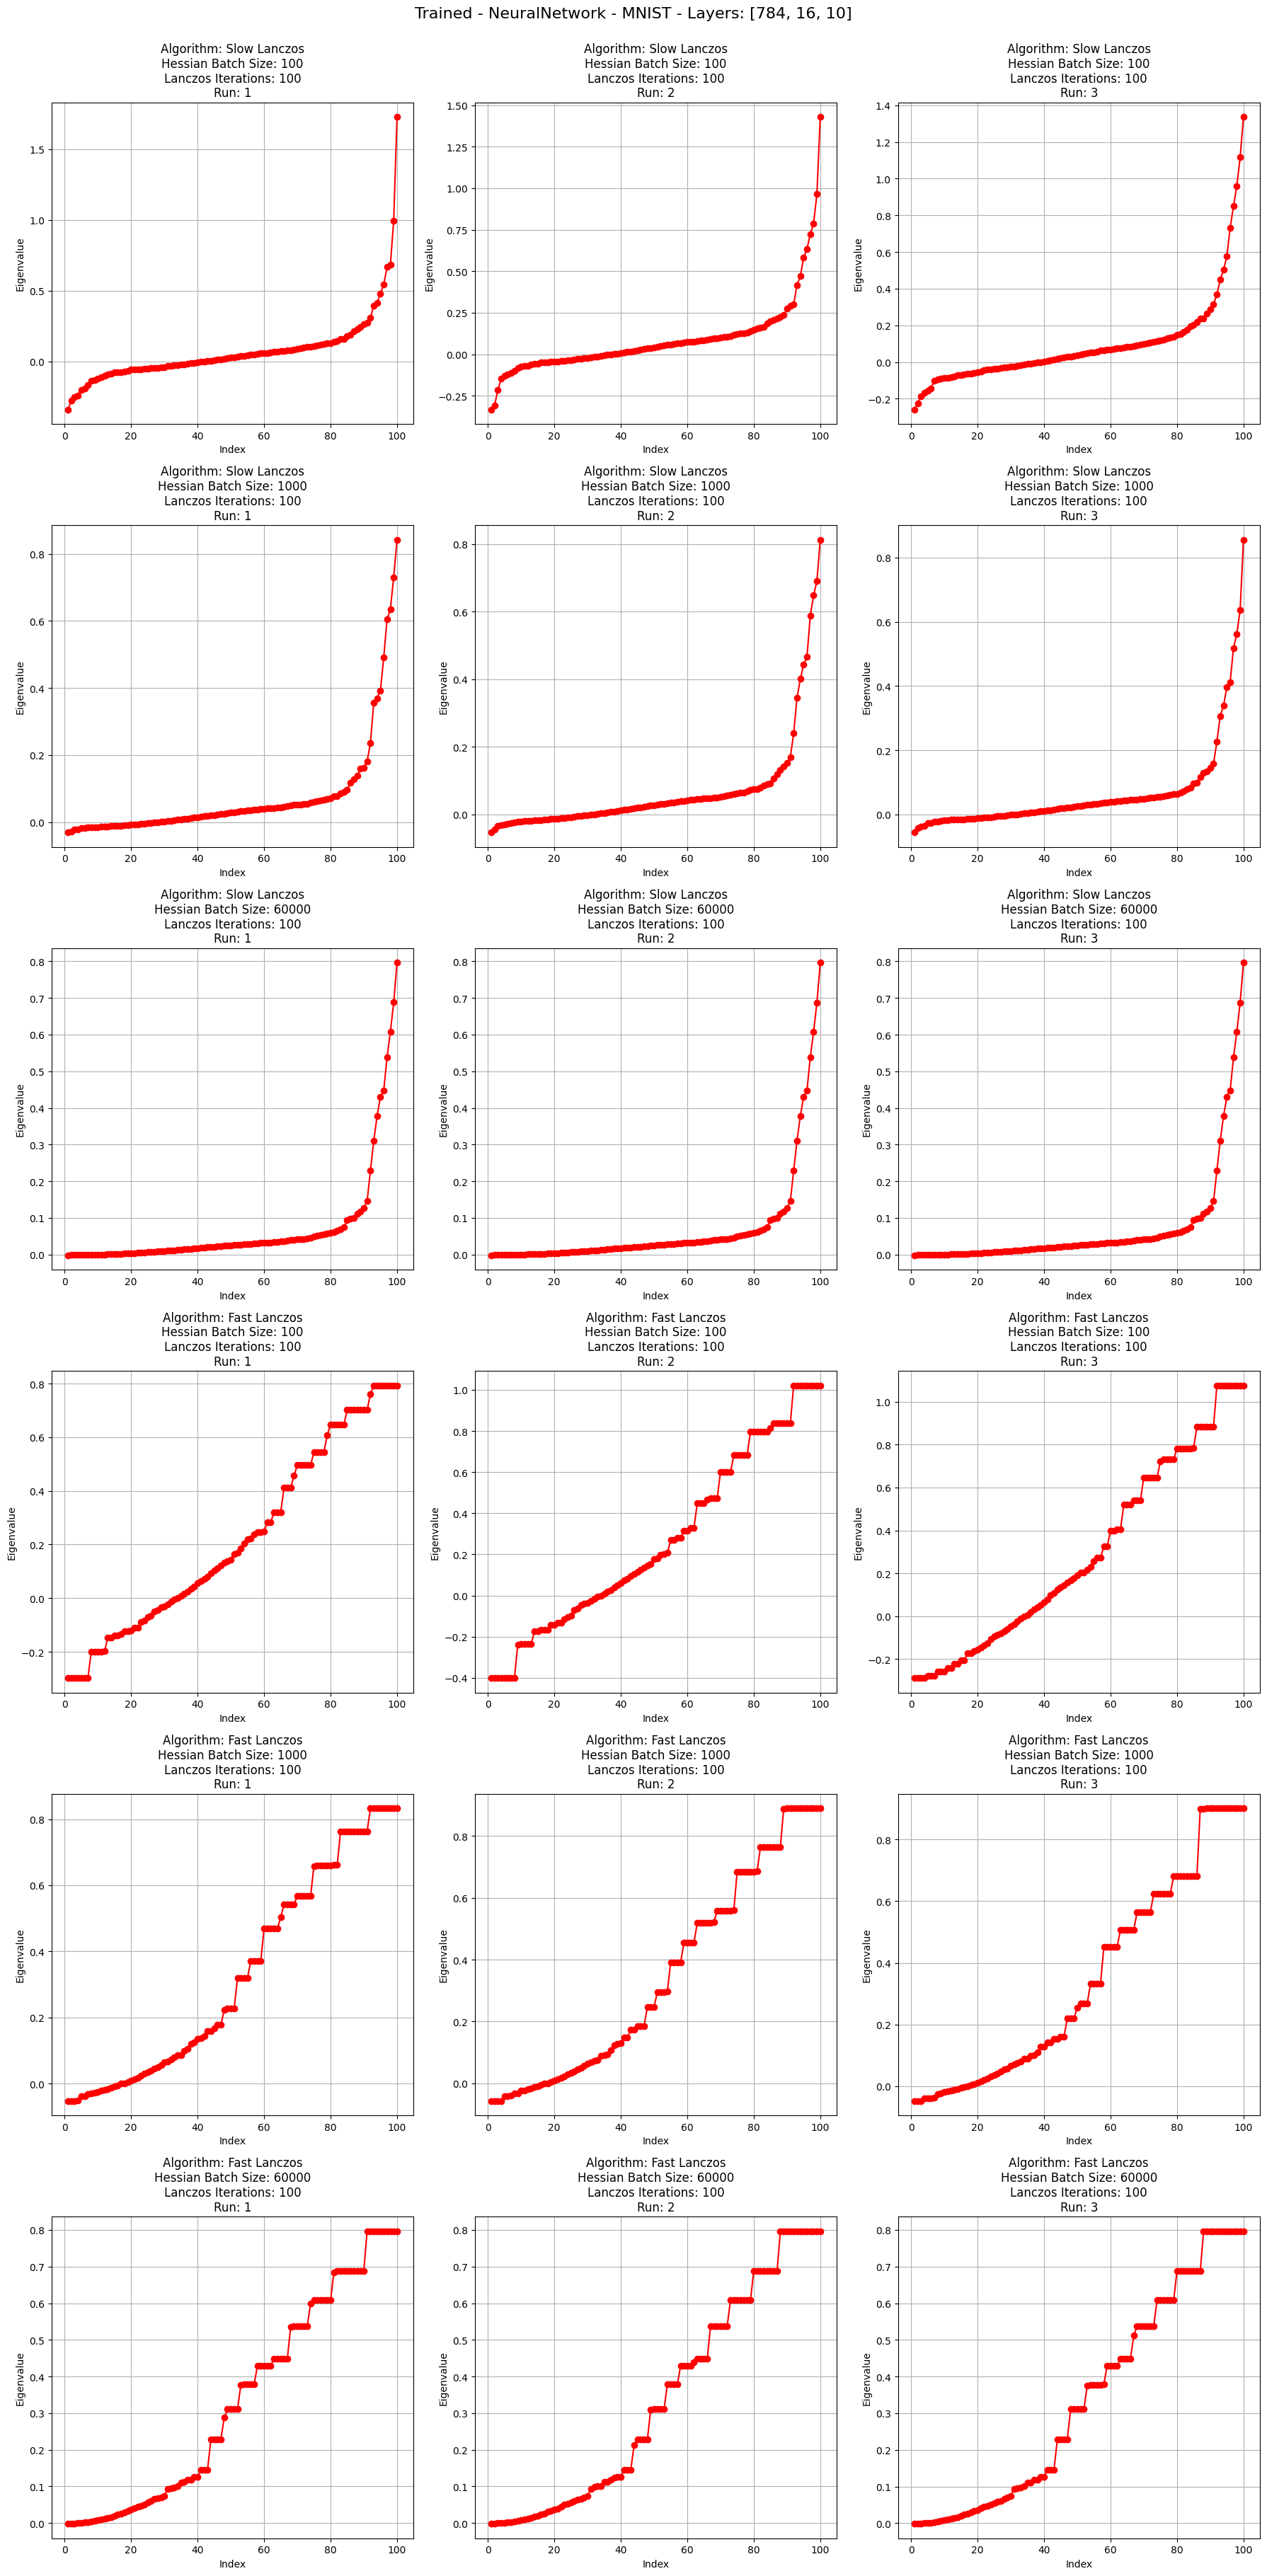

In [41]:
# create subplot grid
n_plots = len(configs)
n_cols = 3  # You can adjust this
n_rows = (n_plots + n_cols - 1) // n_cols
# create figure
plt.figure(figsize=(6*n_cols, 6*n_rows))
# create subplots
for idx, (config, eigenvalues) in enumerate(zip(configs, all_eigenvalues)):
    plt.subplot(n_rows, n_cols, idx + 1)
    sorted_eigenvalues = np.sort(eigenvalues)
    x_indices = np.arange(1, len(sorted_eigenvalues) + 1)
    plt.plot(x_indices, sorted_eigenvalues, marker="o", linestyle="-", color="red")
    plt.title(f"Algorithm: {config['lanczos'].capitalize()} Lanczos\nHessian Batch Size: {config['batch_size']}\nLanczos Iterations: {config['iter_num']}\nRun: {config['run_num']}")
    plt.grid(True)
    plt.xlabel('Index')
    plt.ylabel('Eigenvalue')

plt.tight_layout()
plt.suptitle(plot_title, y=1.01, fontsize=16)
plt.show()

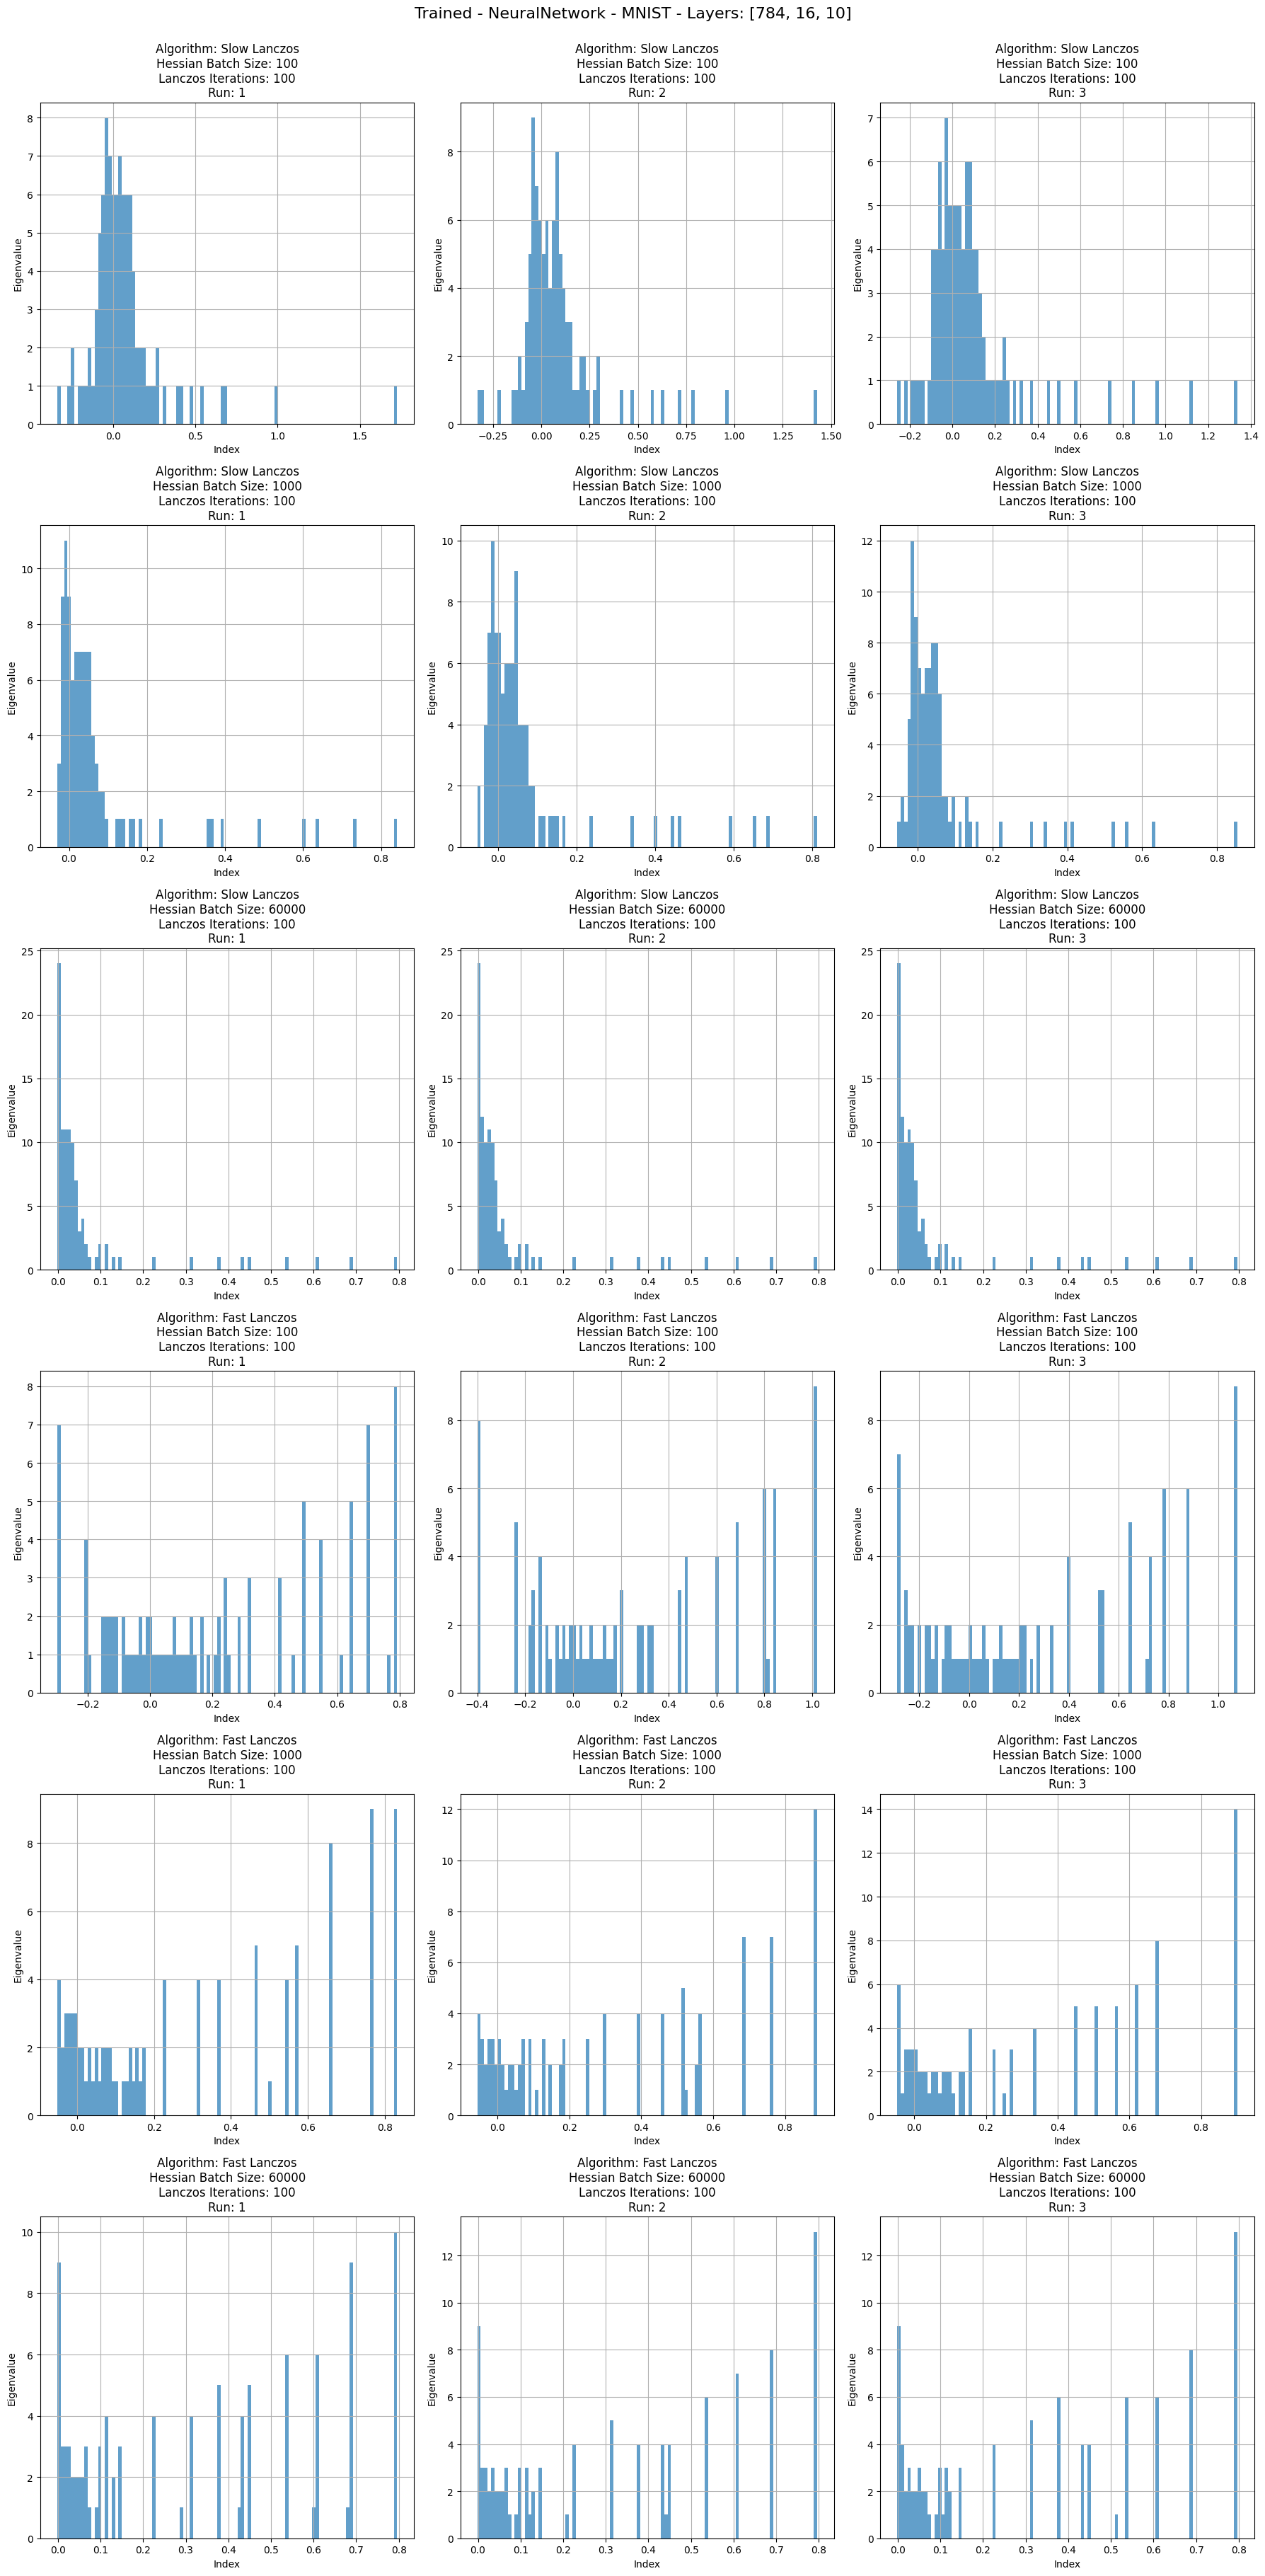

In [42]:
# create subplot grid
n_plots = len(configs)
n_cols = 3  # You can adjust this
n_rows = (n_plots + n_cols - 1) // n_cols
# create figure
plt.figure(figsize=(6*n_cols, 6*n_rows))
# create subplots
for idx, (config, eigenvalues) in enumerate(zip(configs, all_eigenvalues)):
    plt.subplot(n_rows, n_cols, idx + 1)
    plt.hist(eigenvalues, bins=100, alpha=0.7)
    plt.title(f"Algorithm: {config['lanczos'].capitalize()} Lanczos\nHessian Batch Size: {config['batch_size']}\nLanczos Iterations: {config['iter_num']}\nRun: {config['run_num']}")
    plt.grid(True)
    plt.xlabel('Index')
    plt.ylabel('Eigenvalue')

plt.tight_layout()
plt.suptitle(plot_title, y=1.01, fontsize=16)
plt.show()